# Support Vector Machine

Source: [towardsdatascience.com](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47#:~:text=Hyperplanes%20are%20decision%20boundaries%20that,hyperplane%20is%20just%20a%20line.)

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#url = 'https://drive.google.com/file/d/1f8MgS5r_B_aYkrL8v1JMS7ujkZ4I9Q2X/view?usp=share_link'
#path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
from sklearn.datasets import load_iris
df = load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df=df[df['Species']!='Iris-virginica']
df

KeyError: 'Species'

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

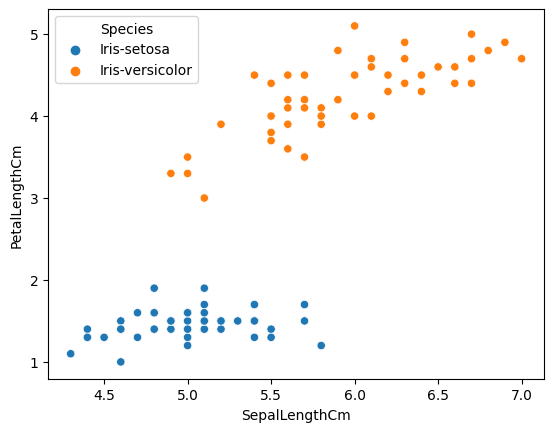

In [2]:
import seaborn as sns
sns.scatterplot(data=df, x="SepalLengthCm", y="PetalLengthCm", hue="Species")

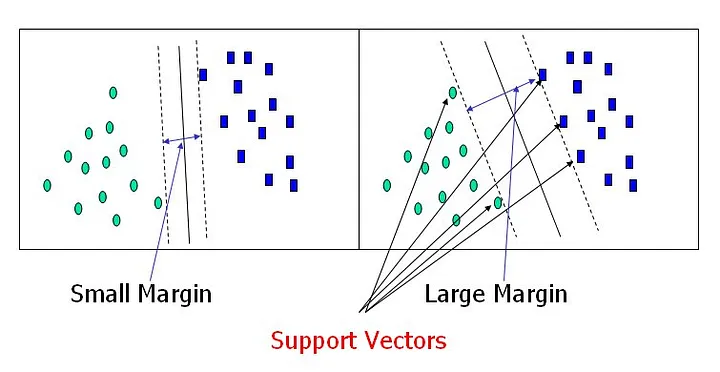

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

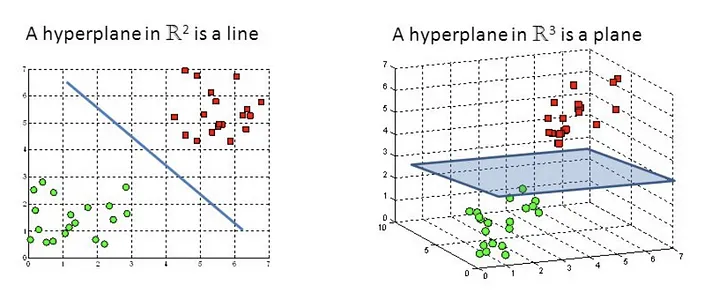

Source: [towardsdatascience.com](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

In [3]:
df['target'] = df['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 0)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,0
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,0
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,0
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,0


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
## Drop rest of the features and extract the target values
X = df[['SepalWidthCm','PetalWidthCm']]
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [7]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [8]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

1.0